### GRIP@ THE SPARKS FOUNDATION

#### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

#### TASK-7 PREDICTION USING DECISION TREE ALGORITHM 

##### CREATE THE DECISION TREE CLASSIFIER

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings 
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = pd.DataFrame(iris.data)
X.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [4]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [6]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
25,5.0,3.0,1.6,0.2
21,5.1,3.7,1.5,0.4
92,5.8,2.6,4.0,1.2
9,4.9,3.1,1.5,0.1


In [7]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(105, 4) (105, 1)
(45, 4) (45, 1)


####  Scaling the Numerical Features

In [9]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
25,5.0,3.0,1.6,0.2
21,5.1,3.7,1.5,0.4
92,5.8,2.6,4.0,1.2
9,4.9,3.1,1.5,0.1


In [10]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_num_rescaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,-1.490493e+00,0.825385,-1.363185,-1.212054
25,-9.936620e-01,-0.134897,-1.246340,-1.349341
21,-8.694542e-01,1.545596,-1.304763,-1.074766
92,1.103186e-15,-1.095178,0.155793,0.023535
9,-1.117870e+00,0.105174,-1.304763,-1.486629


#### RESCALING THE NUMERICAL FEATURE FOR TEST DATA

In [11]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_num_rescaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
128,0.745246,-0.615038,1.090548,1.259124
11,-1.242077,0.825385,-1.246340,-1.349341
118,2.359947,-1.095178,1.850037,1.533699
15,-0.124208,3.226089,-1.304763,-1.074766
123,0.621039,-0.855108,0.681592,0.847261


#### APPLYING DECISION TREE ALGORTHIM

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Let us visualize the Decision Tree to understand it better.

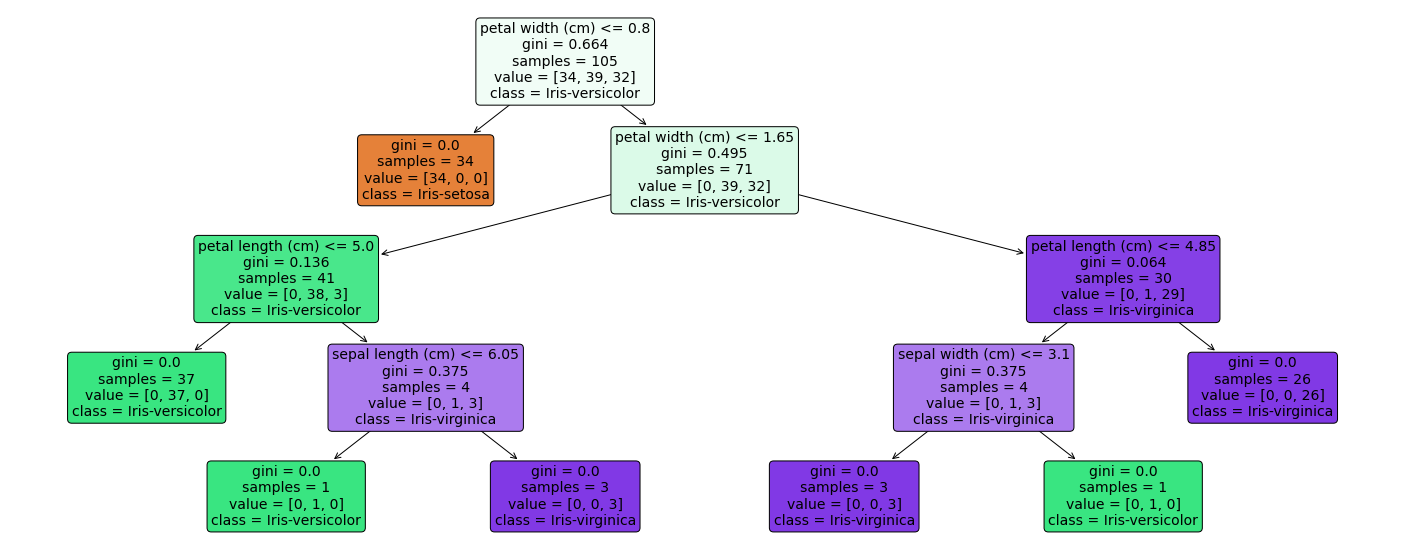

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier, feature_names = X_train.columns, 
              class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )
